### Import libraries

In [13]:
%matplotlib inline

# importing pandas and numpy
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import os

### Import log file

In [40]:
# dit stukje al geven
df = pd.read_csv(os.path.join('..', 'data', 'logs', 'history_20181112_1529.csv'),
                   index_col='datetime', parse_dates=True).drop(['Unnamed: 0'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1062 entries, 2018-11-12 15:28:44.453527 to 2018-11-12 15:29:32.597990
Data columns (total 9 columns):
angle_of_attack    1062 non-null float64
boat_angle         1062 non-null float64
boat_heel          1062 non-null float64
boat_speed         1062 non-null float64
course_error       1062 non-null float64
rudder_angle       1062 non-null float64
target_angle       1062 non-null float64
wind_direction     1062 non-null float64
wind_speed         1062 non-null float64
dtypes: float64(9)
memory usage: 83.0 KB


* angle_of_attack: wind direction relative to the boat
> * A positive angle of attack means the wind is blowing onto the right (starboard) side of the boat
> * A negative angle of attack means the wind is blowing onto the left (port) side of the boat
* boat_angle: compass direction in which the boat is going (North==0/360, East==90, South==180, West==270)
* boat_heel: heeling angle in degrees (rotation around the longitudinal axis).
* boat_speed: speed in knots (5 knots is 9.26 km per hr)
* course_error: difference between boat_angle and target_angle
* rudder_angle: position of the rudder relative to centerline of the boat
* target_angle: compass direction in which you want to go
* wind_direction: direction from where the wind is coming
* wind_speed: wind speed in knots

In [15]:
# Print the first 5 rows of the dataframe
df.head()

,angle_of_attack,boat_angle,boat_heel,boat_speed,course_error,rudder_angle,target_angle,wind_direction,wind_speed
datetime,,,,,,,,,
2018-11-12 15:28:44.453527,-53.106505,359.901100,15.123981,5.021989,-63.905029,0.0,63.60255,306.591015,18.836436
2018-11-12 15:28:44.518398,-52.391296,360.135800,15.372520,5.073522,-64.212480,0.0,63.60255,306.998774,19.325316
2018-11-12 15:28:44.569129,-51.214253,360.520161,15.622710,5.172879,-64.524934,0.0,63.60255,307.863362,19.954969
2018-11-12 15:28:44.612930,-50.896537,358.593684,15.251416,4.854996,-64.829962,-0.3,63.60255,307.876050,19.569278
2018-11-12 15:28:44.661234,-50.559238,358.755685,14.469776,4.842516,-65.088791,-0.6,63.60255,307.954521,18.659106


In [16]:
# Print the last 5 rows of the dataframe
df.tail()

,angle_of_attack,boat_angle,boat_heel,boat_speed,course_error,rudder_angle,target_angle,wind_direction,wind_speed
datetime,,,,,,,,,
2018-11-12 15:29:32.415948,159.416985,185.569827,4.621430,5.631510,-1.165816,0.477439,186.594533,344.845702,13.202068
2018-11-12 15:29:32.461695,159.662492,183.181235,4.732455,5.509949,-1.126529,0.487762,186.594533,345.130496,13.677612
2018-11-12 15:29:32.505048,160.220583,184.569398,4.706921,5.728764,-1.088941,0.498331,186.594533,345.726175,13.973206
2018-11-12 15:29:32.549215,160.297357,186.695002,4.846848,6.068534,-1.049771,0.509545,186.594533,345.842119,14.444687
2018-11-12 15:29:32.597990,160.484526,186.035226,4.589974,5.809354,-1.017031,0.521680,186.594533,346.062028,13.802322


### Plotting the variables
First we will have a visual look at the data.

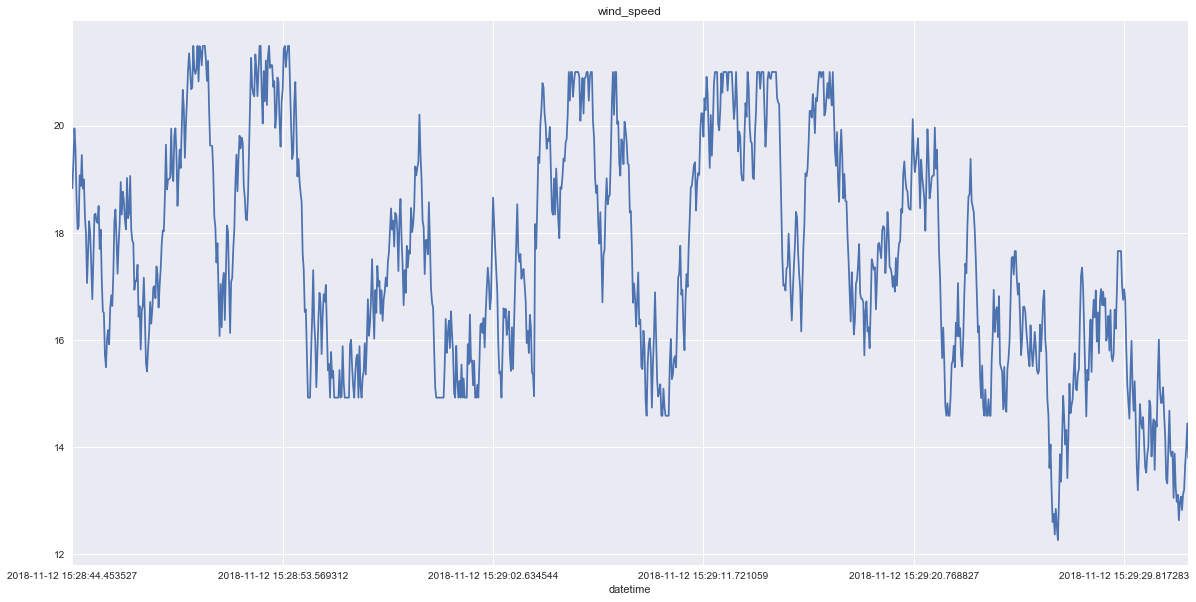

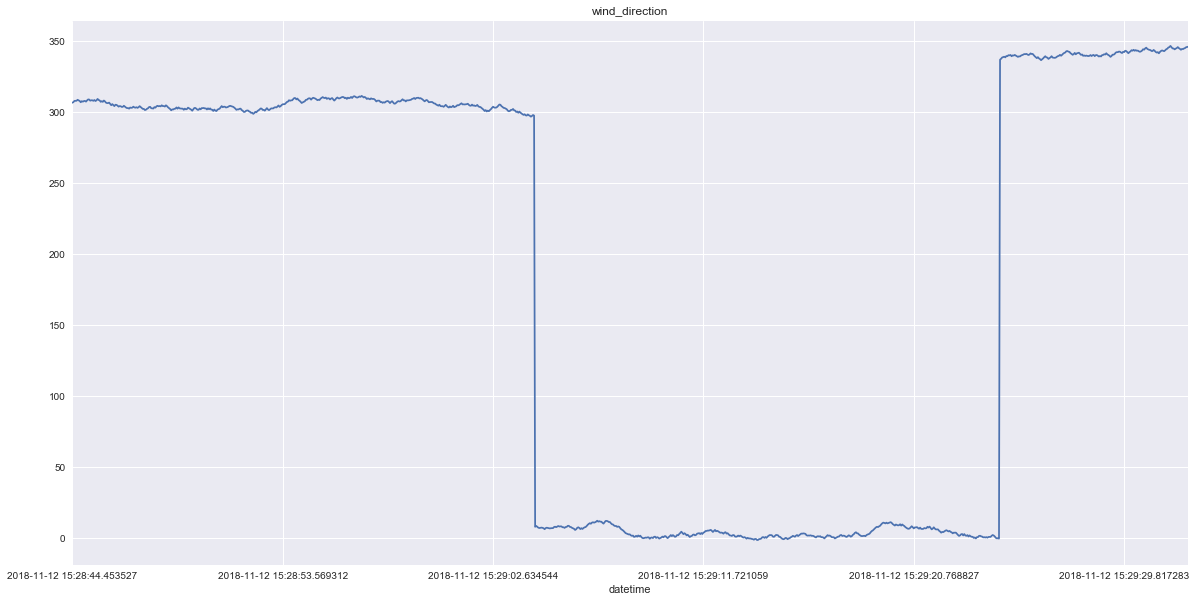

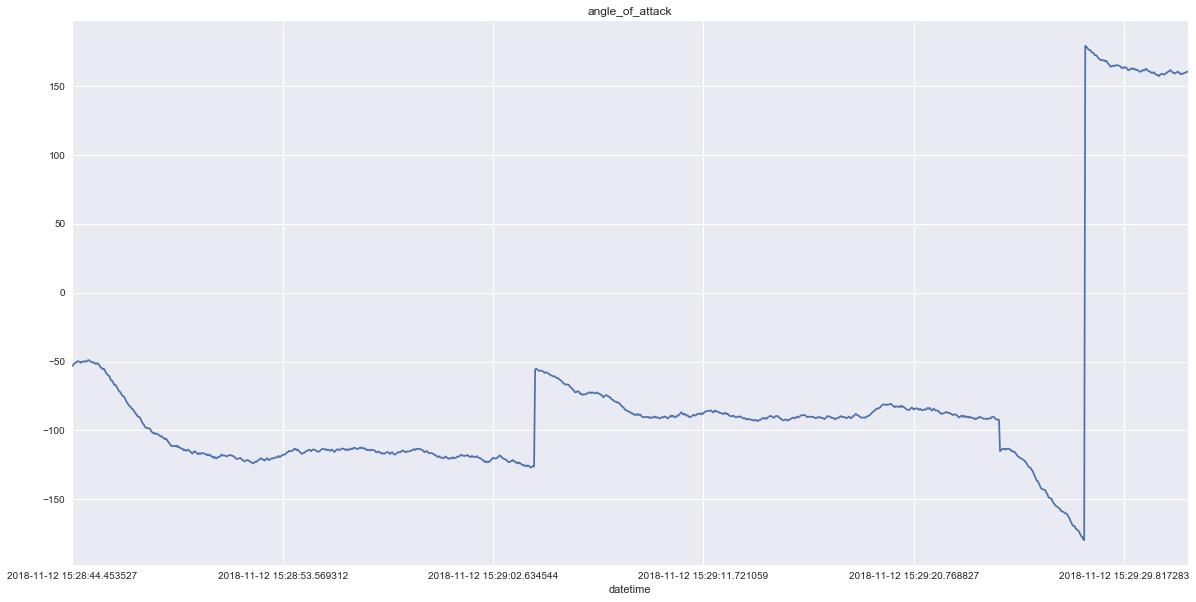

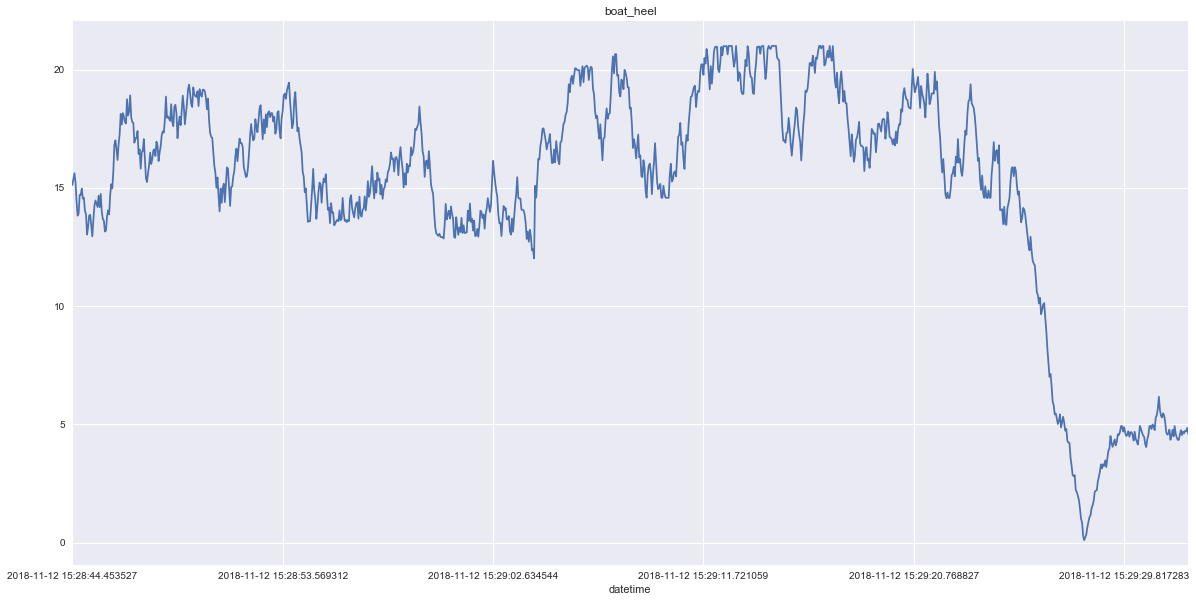

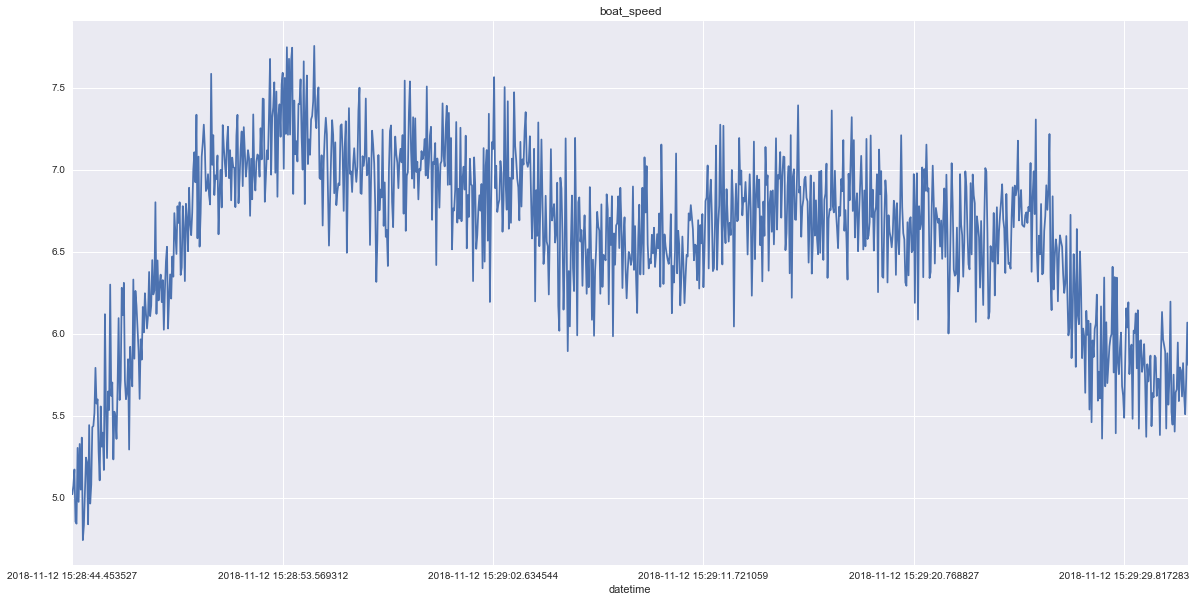

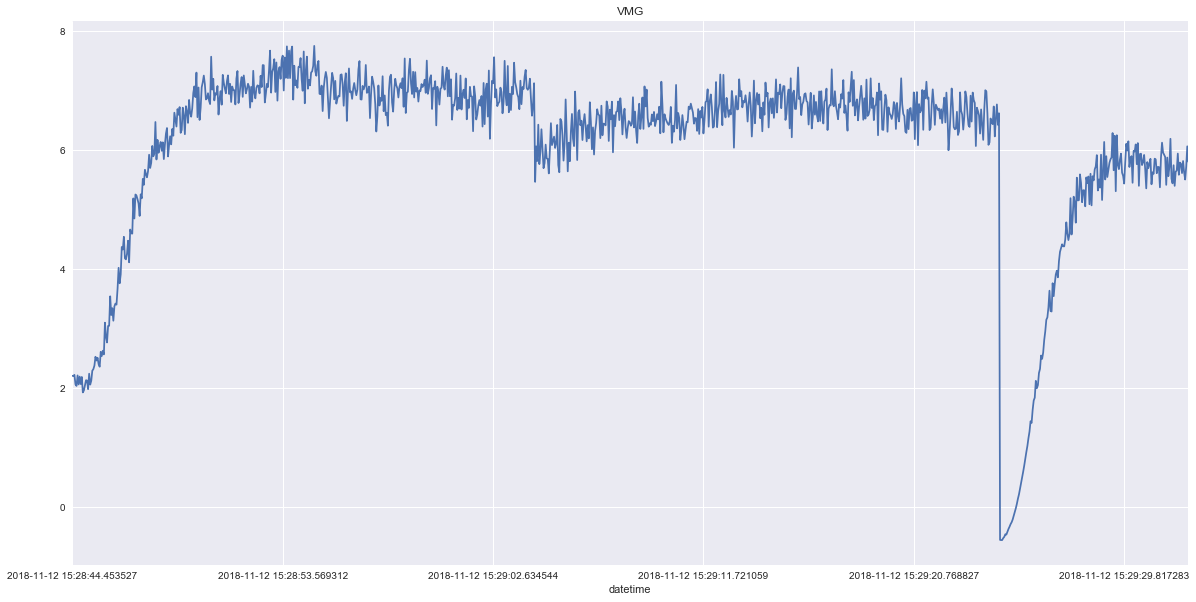

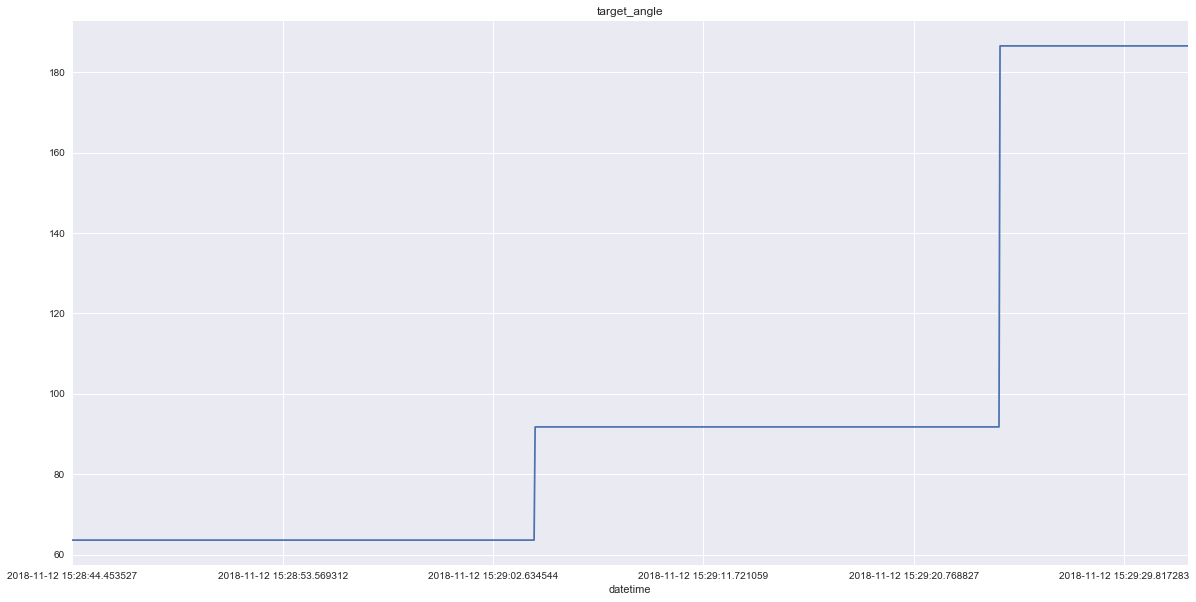

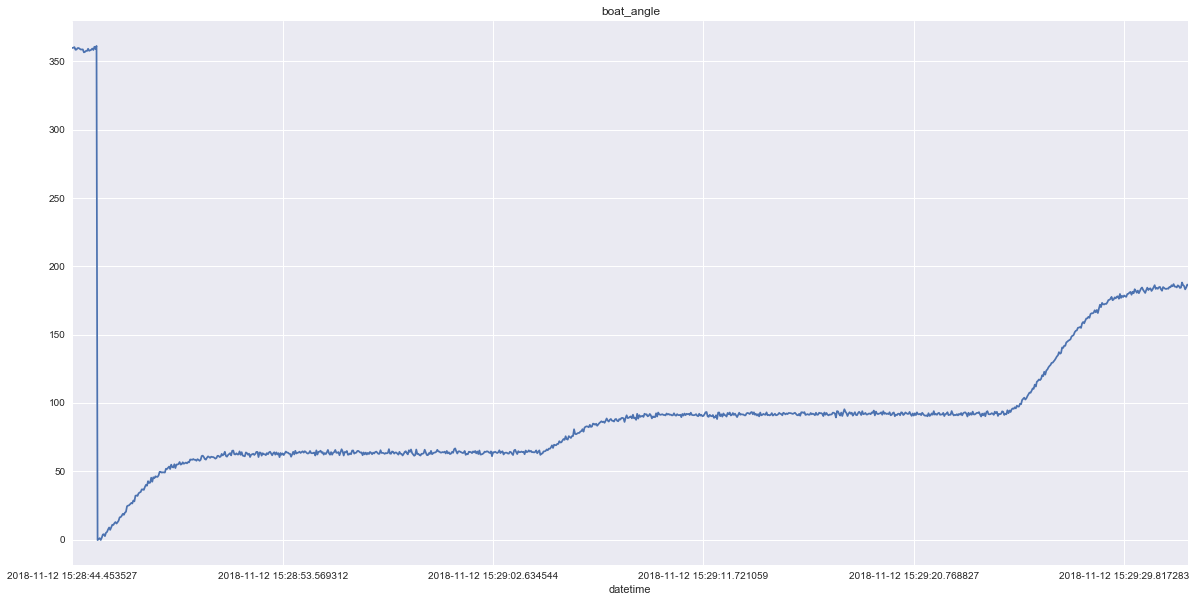

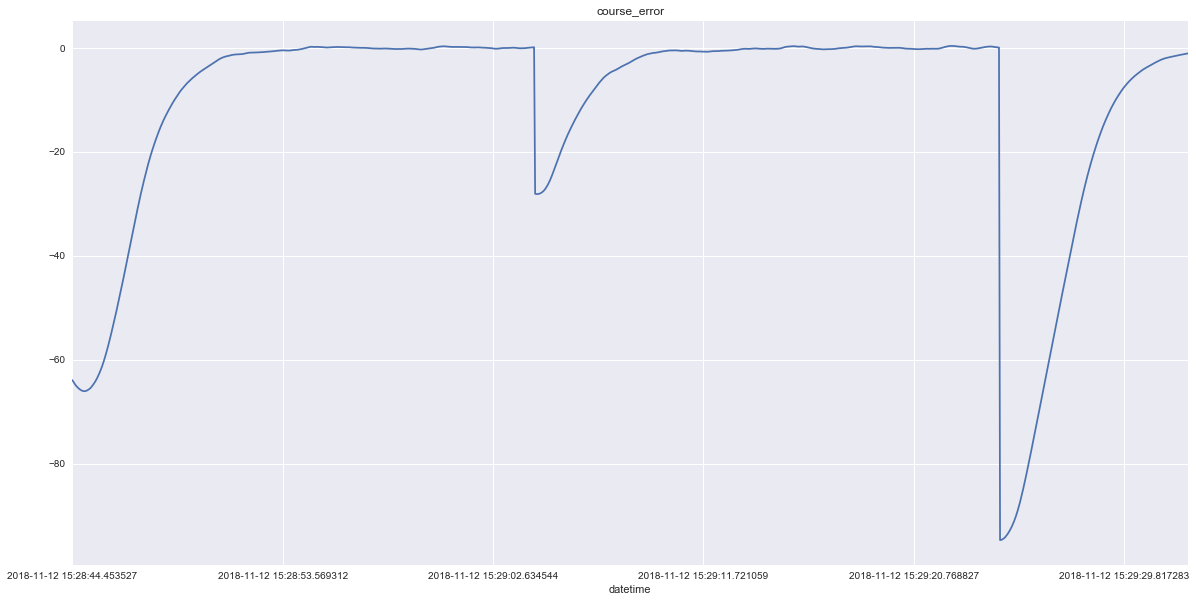

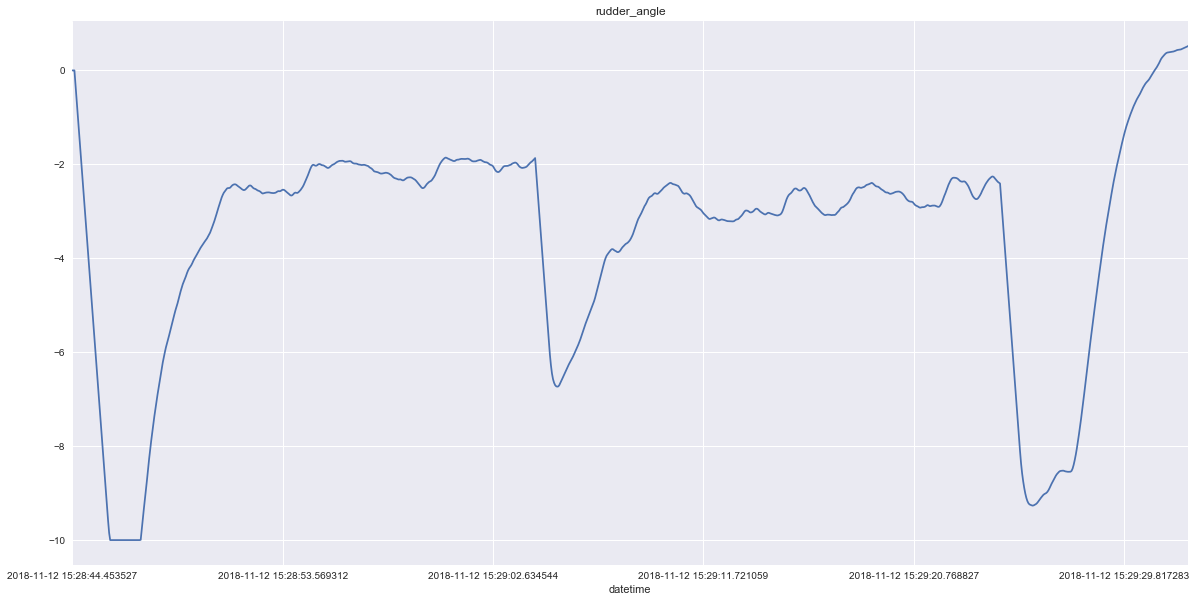

In [32]:
# Plot the data
variables = list(df)
for var in variables:
    _, ax = plt.subplots(figsize=(20, 10))
    ax.set_title(var)
    df[var].plot(ax=ax)
    plt.grid(True)

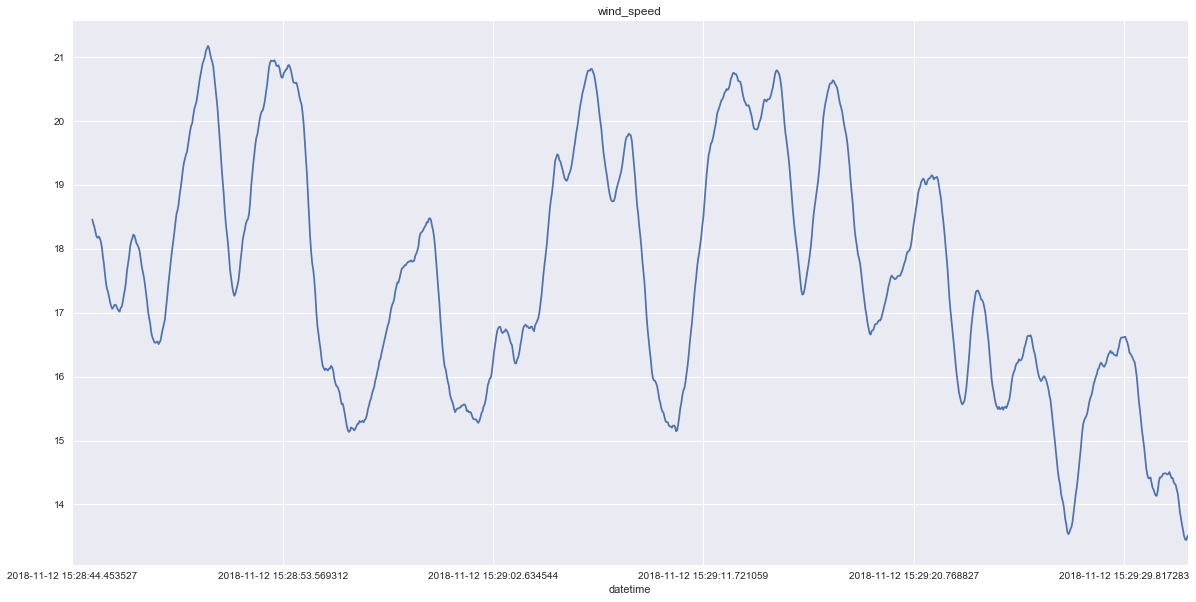

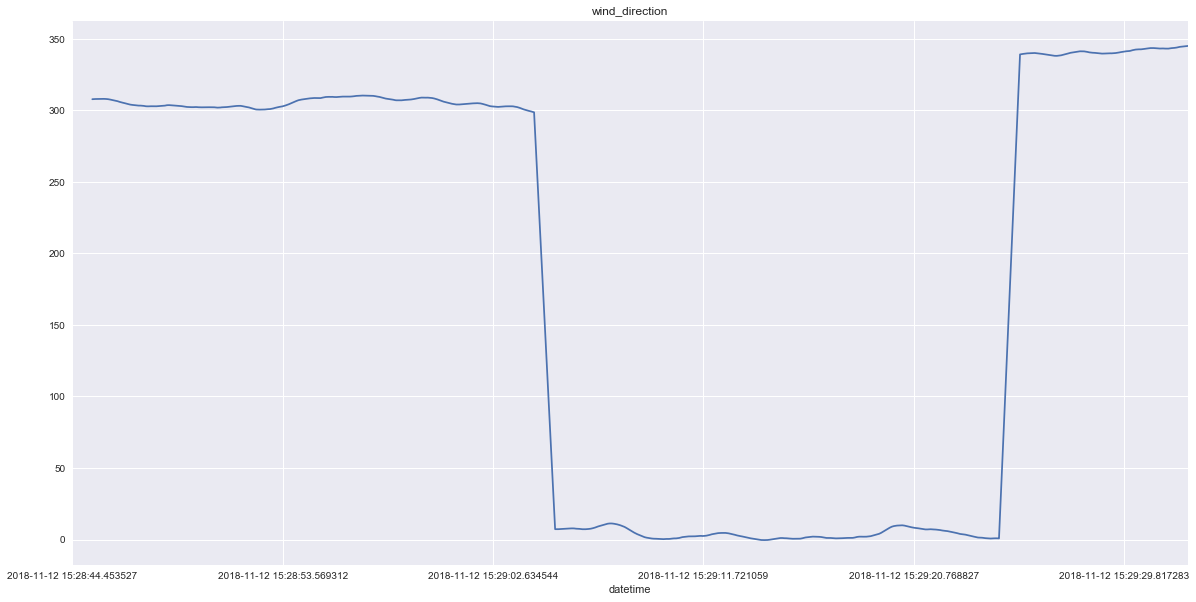

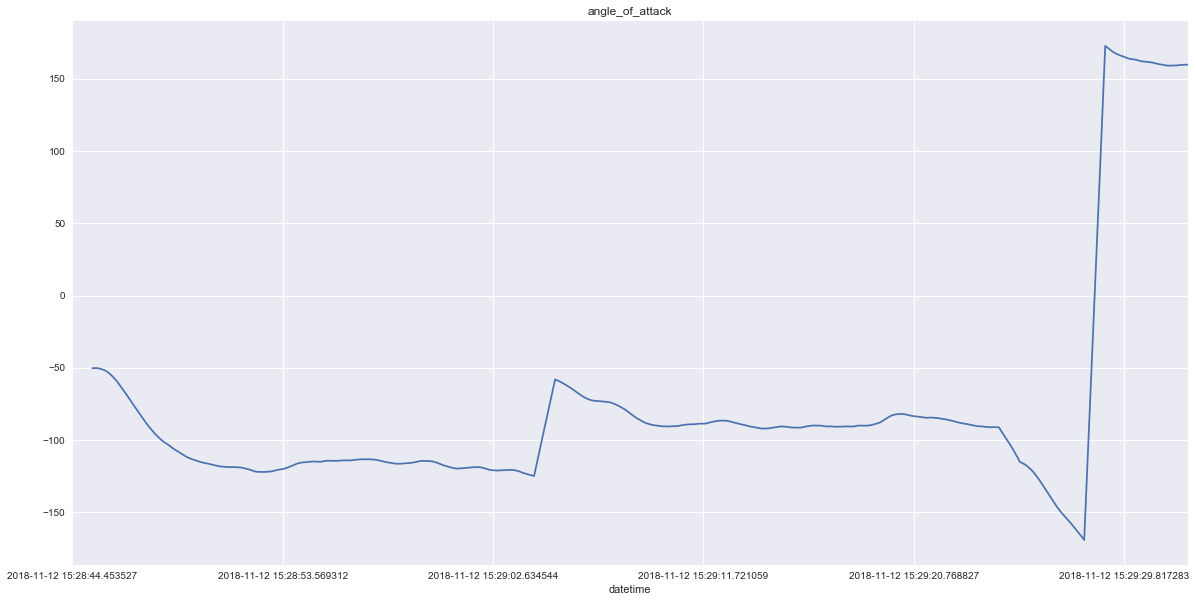

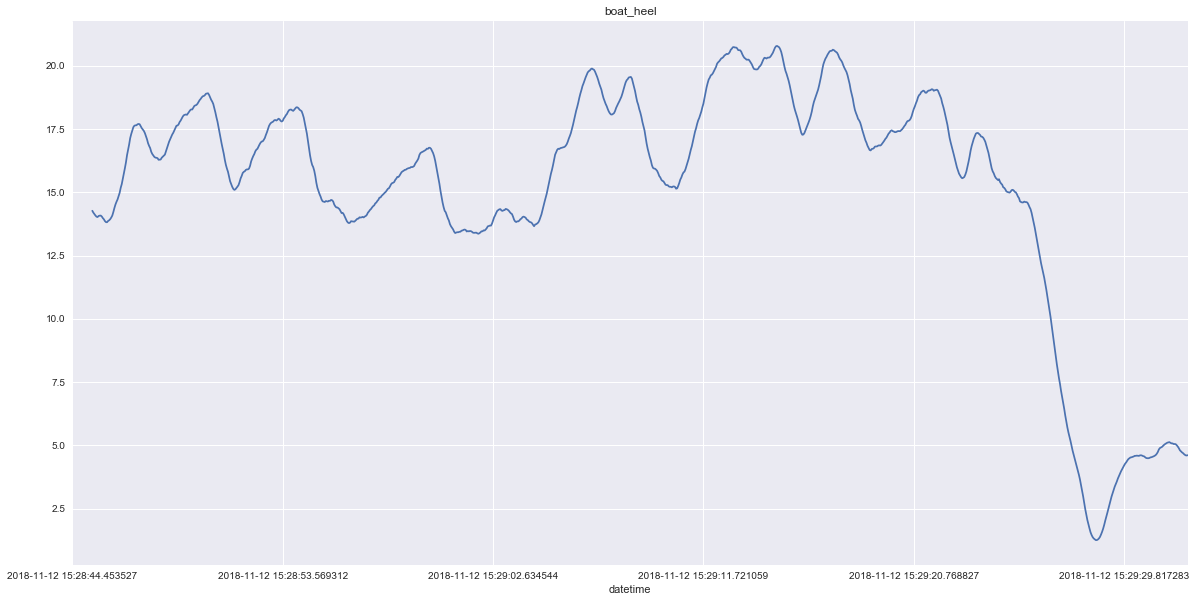

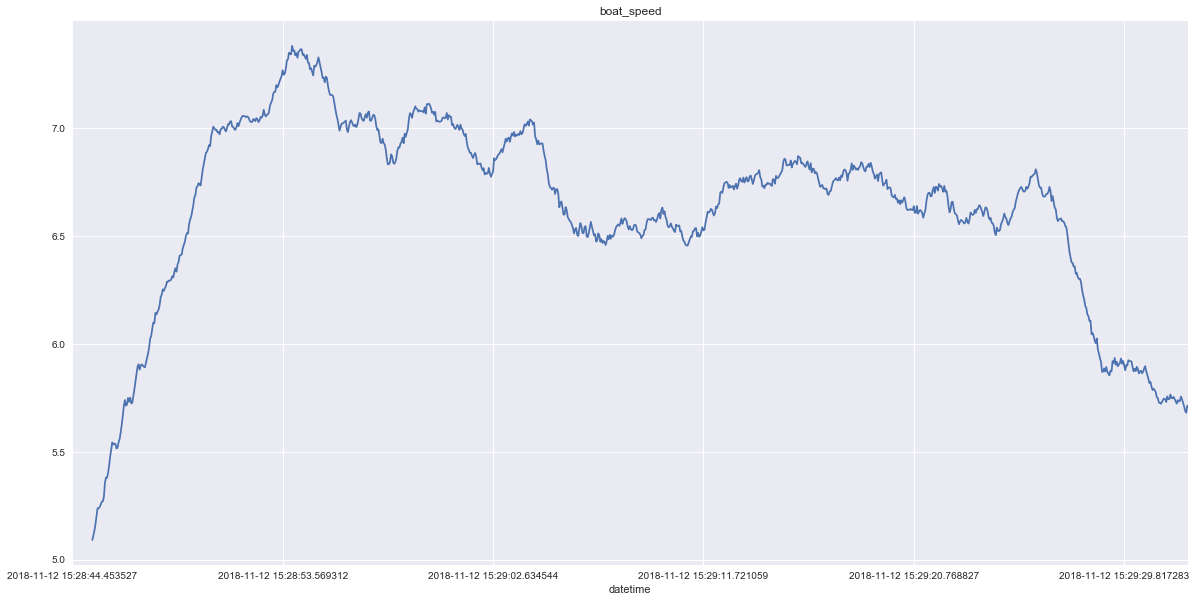

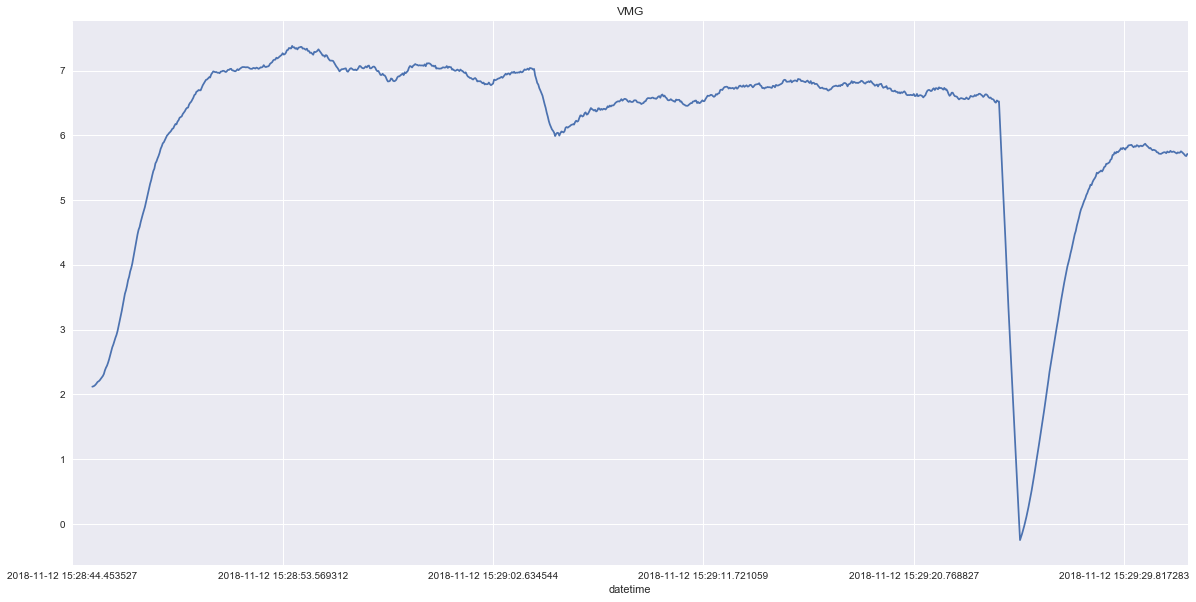

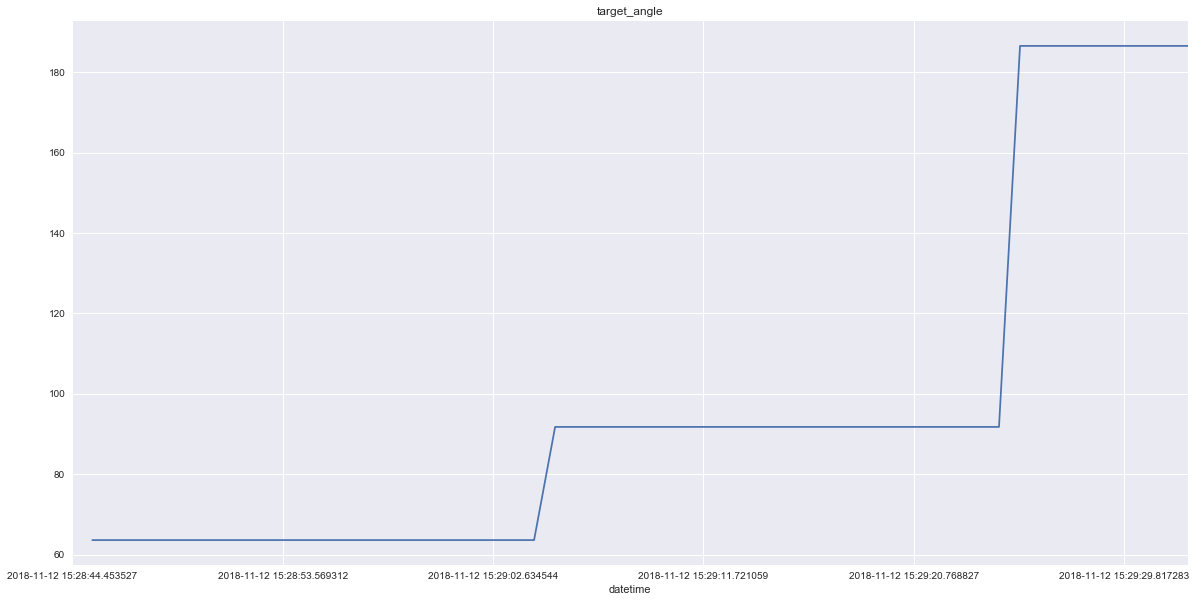

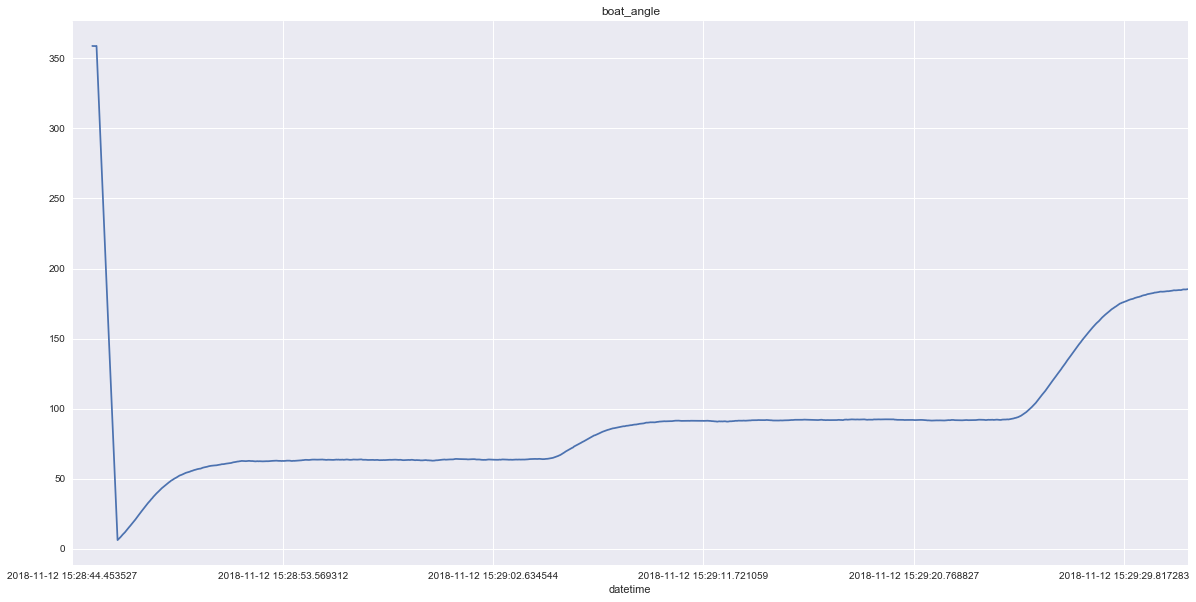

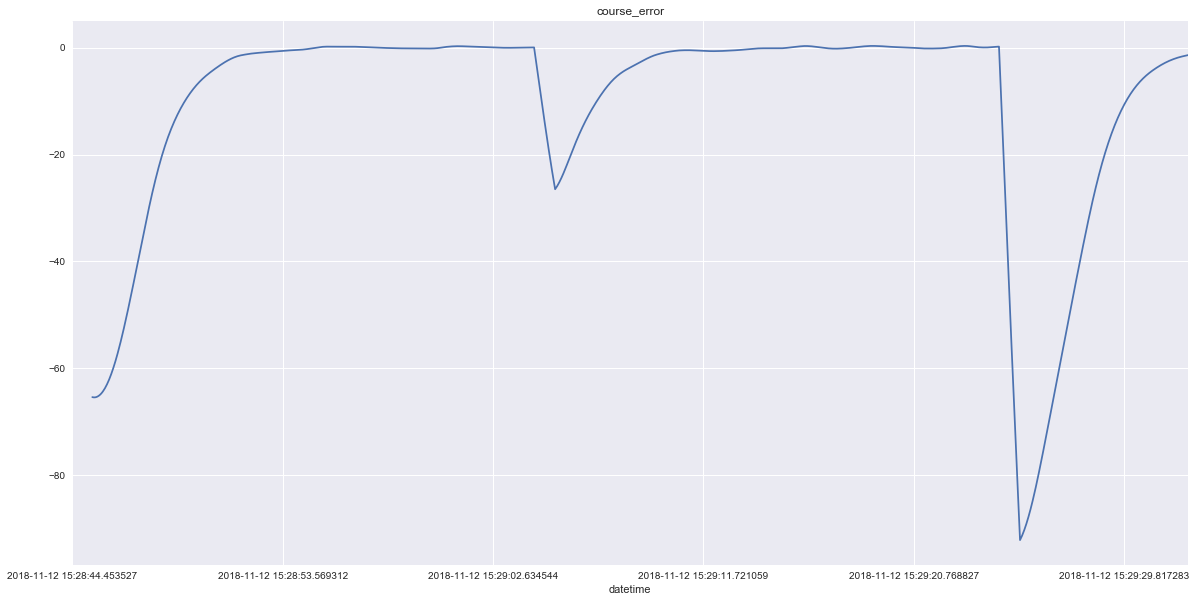

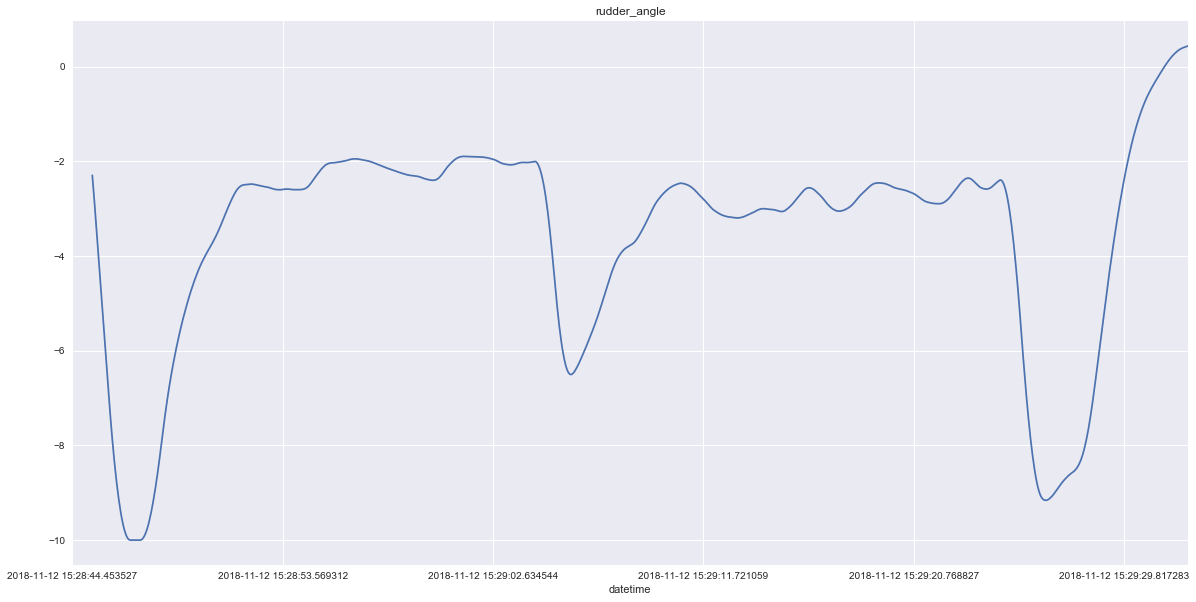

In [33]:
# try moving windows
for var in variables:
    _, ax = plt.subplots(figsize=(20, 10))
    ax.set_title(var)
    df[var].rolling(20).mean().plot(ax=ax)
    plt.grid(True)

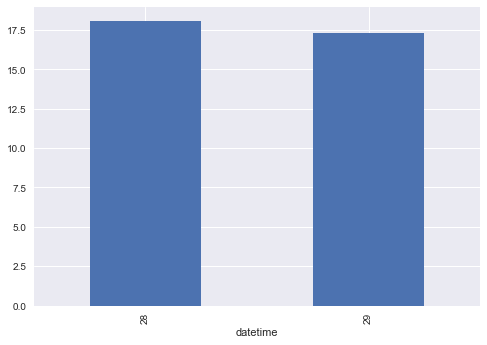

In [48]:
# group average wind_speed per hour
df.index.minute
df.groupby(df.index.minute)['wind_speed'].mean().plot(kind='bar')
plt.show()

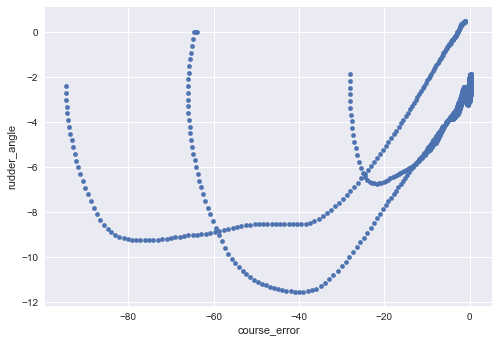

In [49]:
df.plot.scatter(x='course_error', y='rudder_angle')

### Removing NA's

### Removing outliers

In [29]:
# Check minimum and maximum rudder angle:
df.rudder_angle.min(), df.rudder_angle.max()

(-11.560505458924991, 0.5216799551171323)

In [30]:
# Clip rudder angle to [-10, 10]
df["rudder_angle"] = df["rudder_angle"].mask(df["rudder_angle"] > 10, 10)
df["rudder_angle"] = df["rudder_angle"].mask(df["rudder_angle"] < -10, -10)

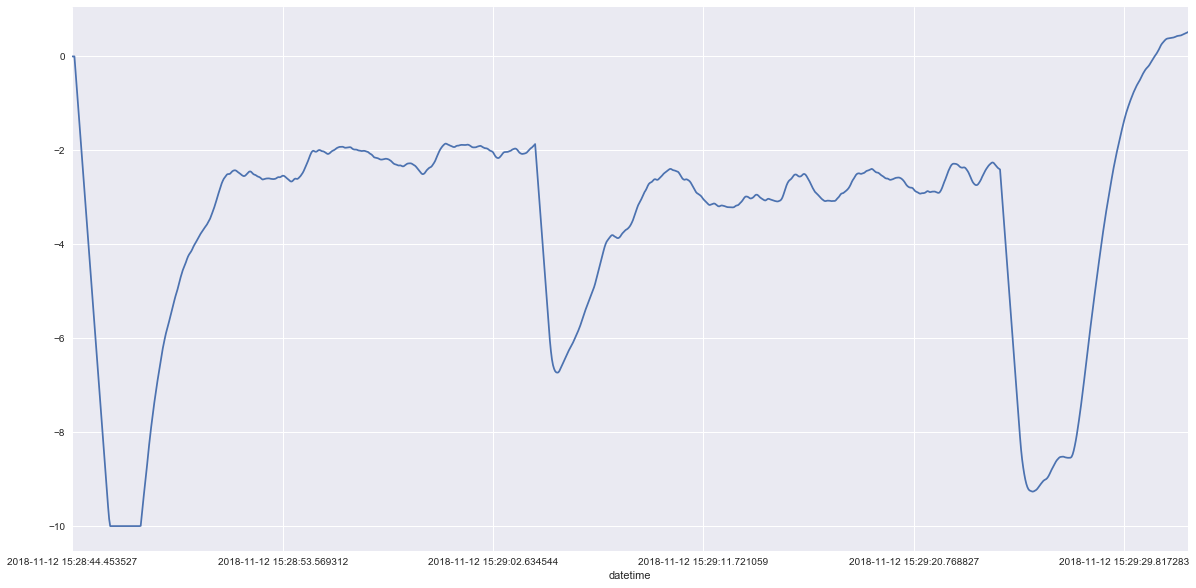

In [31]:
_, ax = plt.subplots(figsize=(20, 10))
df.rudder_angle.plot(ax=ax)

### Creating a new feature

In [22]:
df['VMG'] = df.boat_speed*np.cos(np.deg2rad(df.course_error))

df = df[['wind_speed', 'wind_direction',
         'angle_of_attack', 'boat_heel',
         'boat_speed', 'VMG',
         'target_angle', 'boat_angle', 'course_error',
         'rudder_angle']]

df.head()

,wind_speed,wind_direction,angle_of_attack,boat_heel,boat_speed,VMG,target_angle,boat_angle,course_error,rudder_angle
datetime,,,,,,,,,,
2018-11-12 15:28:44.453527,18.836436,306.591015,-53.106505,15.123981,5.021989,2.208974,63.60255,359.901100,-63.905029,0.0
2018-11-12 15:28:44.518398,19.325316,306.998774,-52.391296,15.372520,5.073522,2.207160,63.60255,360.135800,-64.212480,0.0
2018-11-12 15:28:44.569129,19.954969,307.863362,-51.214253,15.622710,5.172879,2.224950,63.60255,360.520161,-64.524934,0.0
2018-11-12 15:28:44.612930,19.569278,307.876050,-50.896537,15.251416,4.854996,2.064859,63.60255,358.593684,-64.829962,-0.3
2018-11-12 15:28:44.661234,18.659106,307.954521,-50.559238,14.469776,4.842516,2.039732,63.60255,358.755685,-65.088791,-0.6


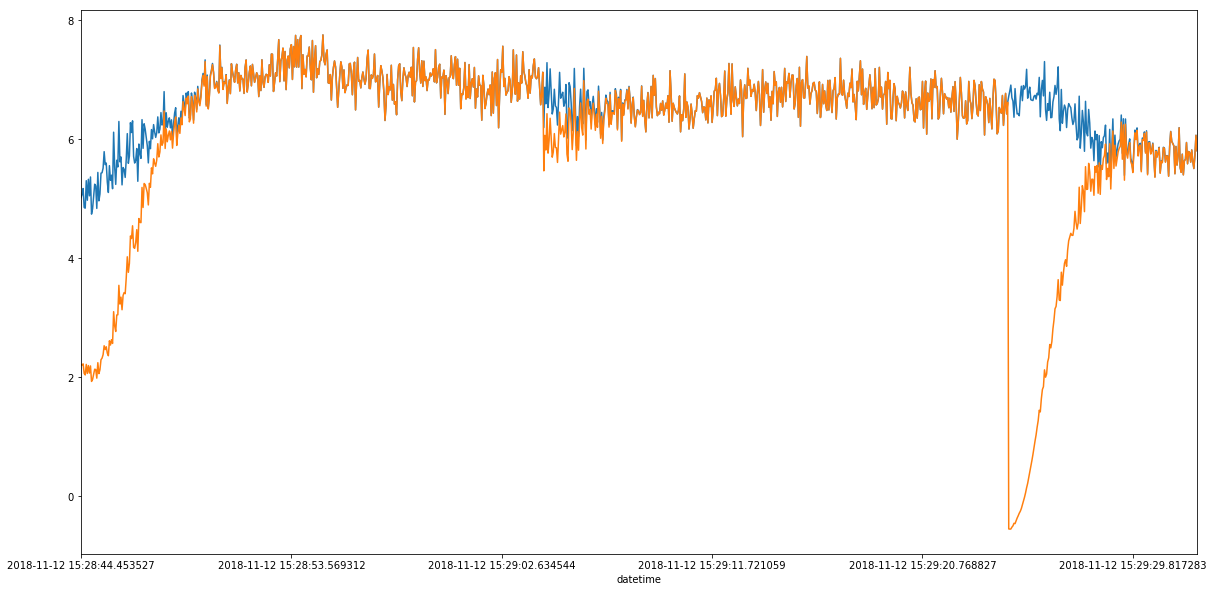

In [23]:
_, ax = plt.subplots(figsize=(20, 10))
df.boat_speed.plot(ax=ax)
df.VMG.plot(ax=ax)

### Plotting correlation matrix

In [26]:
corr = df.corr()
corr.style.background_gradient()

,wind_speed,wind_direction,angle_of_attack,boat_heel,boat_speed,VMG,target_angle,boat_angle,course_error,rudder_angle
wind_speed,1,-0.374881,-0.267104,0.736286,0.230309,0.230464,-0.421065,-0.208507,0.155186,-0.0690506
wind_direction,-0.374881,1,0.14763,-0.592343,-0.115597,-0.3075,0.167643,0.110368,-0.345524,-0.11758
angle_of_attack,-0.267104,0.14763,1,-0.59713,-0.566306,-0.0925478,0.591576,0.52611,0.0439422,0.26372
boat_heel,0.736286,-0.592343,-0.59713,1,0.42096,0.295823,-0.718364,-0.488219,0.247591,-0.0131853
boat_speed,0.230309,-0.115597,-0.566306,0.42096,1,0.532168,-0.397941,-0.562014,0.391727,0.218415
VMG,0.230464,-0.3075,-0.0925478,0.295823,0.532168,1,-0.496848,-0.385474,0.958708,0.528489
target_angle,-0.421065,0.167643,0.591576,-0.718364,-0.397941,-0.496848,1,0.50683,-0.404859,-0.121861
boat_angle,-0.208507,0.110368,0.52611,-0.488219,-0.562014,-0.385474,0.50683,1,-0.288408,0.20854
course_error,0.155186,-0.345524,0.0439422,0.247591,0.391727,0.958708,-0.404859,-0.288408,1,0.664461
rudder_angle,-0.0690506,-0.11758,0.26372,-0.0131853,0.218415,0.528489,-0.121861,0.20854,0.664461,1


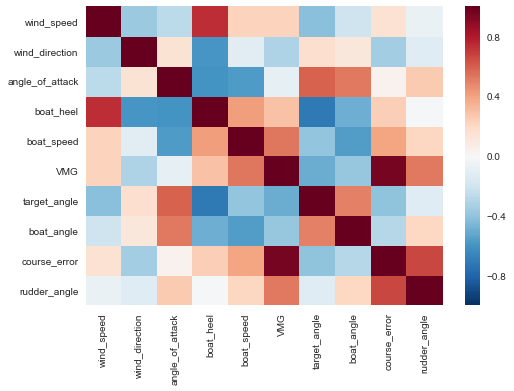

In [27]:
import seaborn as sns
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)